In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance
from scipy.stats import norm
from scipy import stats
from scipy.stats import wasserstein_distance


In [3]:
def gmm20k(blue,orange):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            blue = np.asarray(blue)
            blue =blue.reshape(-1,1)
            gmm.fit(blue)
            bic.append(gmm.bic(blue))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmblue = gmm
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            orange = np.asarray(orange)
            orange =orange.reshape(-1,1)
            gmm.fit(orange)
            bic.append(gmm.bic(orange))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmorange = gmm
    
    means=[]
    for tt in range(len(best_gmmblue.means_)):
        means.append(best_gmmblue.means_[tt][0])
    x = dict(zip(means,best_gmmblue.weights_))
    od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
    od1 = list(zip(list(od1.keys()),list(od1.values())))
    #print(od1)
    means=[]
    for tt in range(len(best_gmmorange.means_)):
        means.append(best_gmmorange.means_[tt][0])
    y = dict(zip(means,best_gmmorange.weights_))
    od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
    od2 = list(zip(list(od2.keys()),list(od2.values())))
    #print(od2)
    maxx = max(len(od1),len(od2))
    diff = abs(len(od1) - len(od2))
    if len(od2) > len(od1):
        for i in range(0,diff):
            od1.append((0,0))
    elif len(od2) < len(od1):
        for i in range(0,diff):
            od2.append((0,0))

    diffmean = []
    diffweights = []
    for tt in range(len(od2)):
        diffmean.append(abs(od1[tt][1] - od2[tt][1]))
        diffweights.append(abs(od1[tt][0] - od2[tt][0])) 
    #print(diffweights)
    r=[]
    for i in range(0,len(diffmean)):
        r.append(diffmean[i] * diffweights[i])
    #print(len(od1) , len(od2))
    return od1,od2,sum(r)

In [4]:
def gmm10k(blue,orange):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            blue = np.asarray(blue)
            blue =blue.reshape(-1,1)
            gmm.fit(blue)
            bic.append(gmm.bic(blue))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmblue = gmm
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 8)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            orange = np.asarray(orange)
            orange =orange.reshape(-1,1)
            gmm.fit(orange)
            bic.append(gmm.bic(orange))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmmorange = gmm
    
    #print(best_gmmblue.get_params())
    #print(best_gmmorange.get_params())
    #print(best_gmmblue.means_)
    #print(best_gmmorange.means_)
    #print(best_gmmblue.weights_)
    #print(best_gmmorange.weights_)
    means=[]
    for tt in range(len(best_gmmblue.means_)):
        means.append(best_gmmblue.means_[tt][0])
    x = dict(zip(best_gmmblue.weights_,means))
    od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
    od1 = list(zip(list(od1.keys()),list(od1.values())))
    means=[]
    for tt in range(len(best_gmmorange.means_)):
        means.append(best_gmmorange.means_[tt][0])
    y = dict(zip(best_gmmorange.weights_,means))
    od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
    od2 = list(zip(list(od2.keys()),list(od2.values())))
    maxx = max(len(od1),len(od2))
    diff = abs(len(od1) - len(od2))
    if len(od2) > len(od1):
        for i in range(0,diff):
            od1.append((0,0))
    elif len(od2) < len(od1):
        for i in range(0,diff):
            od2.append((0,0))
    #print(maxx)
    #print(od1)
    #print(od2)
    diffmean = []
    diffweights = []
    for tt in range(len(od2)):
        diffmean.append(abs(od1[tt][1] - od2[tt][1]))
        diffweights.append(abs(od1[tt][0] - od2[tt][0])) 
    #print(diffweights)
    r=[]
    for i in range(0,len(diffmean)):
        r.append(diffmean[i] * diffweights[i])
    #print(len(od1) , len(od2))
    return od1,od2,sum(r)

In [5]:
def jacciboi(blue,orange):
    blue = np.append(blue,orange.max())
    blue = np.append(blue,orange.min())
    orange = np.append(orange,blue.max())
    orange = np.append(orange,blue.min())
    count1, bin_edges1 = np.histogram(blue, bins=20)
    count2, bin_edges2 = np.histogram(orange, bins=20)
    intersect=[]
    union=[]
    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()
    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()
    jacc1 = isum/usum
    jacc1
    return jacc1

<AxesSubplot:ylabel='Density'>

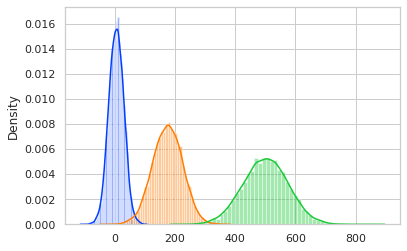

In [5]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 =  np.random.normal(loc=175,scale=50,size=10000)
value3 =  np.random.normal(loc=500,scale=75,size=10000)
blue = np.concatenate((value1,value2,value3))
sns.distplot(value1,bins=50)
sns.distplot(value2,bins=50)
sns.distplot(value3,bins=50)

In [6]:
_,_,r12 = gmm10k(value1,value2)
_,_,r23 = gmm10k(value2,value3)
_,_,r13 = gmm10k(value1,value3)

## Edge case - one component only so diffweight = 0, metric = 0

In [7]:
print(r12,r23,r13)

0.0 0.0 0.0


In [8]:
_,_,r12 = gmm20k(value1,value2)
_,_,r23 = gmm20k(value2,value3)
_,_,r13 = gmm20k(value1,value3)

In [9]:
print(r12,r23,r13)

0.0 0.0 0.0


<AxesSubplot:ylabel='Density'>

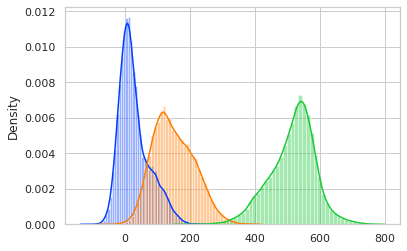

In [10]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
blue = np.concatenate((value1,value2))
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
orange = np.concatenate((value1,value2))
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
green = np.concatenate((value1,value2))
sns.distplot(blue,bins=50)
sns.distplot(orange,bins=50)
sns.distplot(green,bins=50)

In [12]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r23 = gmm10k(orange,green)
_,_,r13 = gmm10k(blue,green)
#38.19839900825517 230.397105184326 305.8584873843776


In [13]:
w1

[(0.7360453904985781, 6.78150531403822),
 (0.2639546095014196, 89.1463496548386)]

In [14]:
w2

[(0.5759998826353234, 110.28783666470146),
 (0.4240001173646747, 204.14131919243917)]

In [15]:
w3

[(0.5807200960314773, 110.63632104593509),
 (0.41927990396851983, 204.7152474439254),
 (0, 0),
 (0, 0)]

In [16]:
w4

[(0.42817207815294694, 547.9670190030921),
 (0.2518904944448725, 484.0213025096724),
 (0.16843683345457236, 412.5289765716262),
 (0.1515005939476086, 596.3987755718317)]

In [17]:
print(r12,r23,r13)

34.97015166944405 273.3066500153725 327.686867756947


In [18]:
print(wasserstein_distance(orange,blue))
print(wasserstein_distance(orange,green))
print(wasserstein_distance(green,blue))

121.55963863288616
366.30266147603555
487.8623001089218


In [19]:
print(jacciboi(orange,blue))
print(jacciboi(orange,green))
print(jacciboi(green,blue))

0.16226999806314157
0.005293841720833613
0.00030005000833472245


<AxesSubplot:ylabel='Density'>

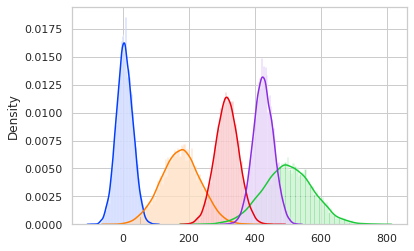

In [20]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
#blue = np.concatenate((value1,value2))
blue = value1
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
#orange = np.concatenate((value1,value2))
orange = value1
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
#green = np.concatenate((value1,value2))
green = value1
value1 = np.random.normal(loc=315,scale=35,size=10000)
value2 = np.random.normal(loc=280,scale=45,size=5000)
#red = np.concatenate((value1,value2))
red = value1
value1 = np.random.normal(loc=425,scale=30,size=10000)
value2 = np.random.normal(loc=475,scale=45,size=5000)
#violet = np.concatenate((value1,value2))
violet = value1
sns.distplot(blue,bins=150)
sns.distplot(orange,bins=150)
sns.distplot(green,bins=150)
sns.distplot(red,bins=150)
sns.distplot(violet,bins=150)

In [39]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        a[i][j] = wasserstein_distance(c,b)

In [41]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s
[blue,       orange,     green,      red,       violet]

,0,1,2,3,4
0,0.000000,122.147761,488.170549,651.685178,776.484740
1,122.147761,0.000000,366.022788,529.537418,654.336979
2,488.170549,366.022788,0.000000,163.514629,288.314191
3,651.685178,529.537418,163.514629,0.000000,124.801111
4,776.484740,654.336979,288.314191,124.801111,0.000000


In [43]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        _,_,a[i][j] = gmm10k(c,b)

In [44]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s
[blue,       orange,     green,      red,       violet]z

,0,1,2,3,4
0,0.000011,33.273010,345.893925,198.166158,241.836560
1,33.220395,0.000043,287.738420,5.162408,379.174783
2,347.217819,286.793722,0.129011,228.616061,444.552908
3,196.998645,6.233135,228.383405,0.000000,368.004587
4,241.836560,379.174783,445.570527,368.119675,0.000000


In [45]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        a[i][j] = jacciboi(c,b)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s
[blue,       orange,     green,      red,       violet]

,0,1,2,3,4
0,1.000000,0.158366,0.000267,0.000100,0.000100
1,0.158366,1.000000,0.005260,0.000100,0.000100
2,0.000267,0.005260,1.000000,0.035871,0.007556
3,0.000100,0.000100,0.035871,1.000000,0.093440
4,0.000100,0.000100,0.007556,0.093440,1.000000


In [21]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(blue,green)
_,_,r14 = gmm10k(blue,red)
_,_,r15 = gmm10k(blue,violet)
print(r12,r13,r14,r15)

0.0 0.0 0.0 0.0


In [22]:
print(wasserstein_distance(blue,orange))
print(wasserstein_distance(blue,green))
print(wasserstein_distance(blue,red))
print(wasserstein_distance(blue,violet))

170.11078510910792
494.29827289141247
309.86666176541036
420.1881351876123


In [23]:
print(jacciboi(blue,orange))
print(jacciboi(blue,green))
print(jacciboi(blue,red))
print(jacciboi(blue,violet))

0.020247870658438312
0.00014999250037498125
0.00014999250037498125
0.00014999250037498125


In [24]:
print(jacciboi(blue,orange))
print(jacciboi(orange,red))
print(jacciboi(red,violet))
print(jacciboi(green,violet))

0.020247870658438312
0.07762753865215752
0.04776869893148963
0.2526770618072515


<AxesSubplot:ylabel='Density'>

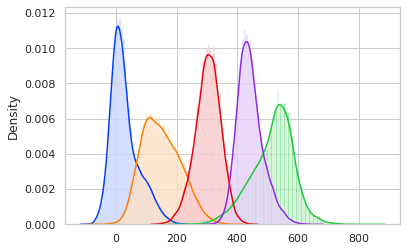

In [46]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
blue = np.concatenate((value1,value2))
#blue = value1
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
orange = np.concatenate((value1,value2))
#orange = value1
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
green = np.concatenate((value1,value2))
#green = value1
value1 = np.random.normal(loc=315,scale=35,size=10000)
value2 = np.random.normal(loc=280,scale=45,size=5000)
red = np.concatenate((value1,value2))
#red = value1
value1 = np.random.normal(loc=425,scale=30,size=10000)
value2 = np.random.normal(loc=475,scale=45,size=5000)
violet = np.concatenate((value1,value2))
#violet = value1
sns.distplot(blue,bins=150)
sns.distplot(orange,bins=150)
sns.distplot(green,bins=150)
sns.distplot(red,bins=150)
sns.distplot(violet,bins=150)

In [47]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        a[i][j] = wasserstein_distance(c,b)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4
0,0.000000,121.146631,488.210066,274.459358,413.829989
1,121.146631,0.000000,367.063435,153.312728,292.683358
2,488.210066,367.063435,0.000000,213.750707,75.608375
3,274.459358,153.312728,213.750707,0.000000,139.370630
4,413.829989,292.683358,75.608375,139.370630,0.000000


In [48]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
qw=0
for i,c in enumerate(x):
    for j,b in enumerate(x):
        _,_,a[i][j] = gmm10k(c,b)
        qw=qw+1
        print(qw)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


,0,1,2,3,4
0,0.000001,36.396997,327.214810,86.236947,49.360970
1,36.385737,0.000001,267.400126,0.869293,60.847748
2,327.073971,244.996982,0.441787,203.536076,176.093657
3,86.539397,1.723954,214.469598,0.020346,33.892671
4,48.603641,63.148248,169.277093,33.893761,0.000000


In [49]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        a[i][j] = jacciboi(c,b)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4
0,1.000000,0.160337,0.000133,0.003915,0.000100
1,0.160337,1.000000,0.007150,0.090658,0.001770
2,0.000167,0.007150,1.000000,0.031916,0.284693
3,0.003915,0.090658,0.031916,1.000000,0.035692
4,0.000100,0.001770,0.284693,0.035692,1.000000


In [26]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(blue,green)
_,_,r14 = gmm10k(blue,red)
_,_,r15 = gmm10k(blue,violet)
print(r12,r13,r14,r15)

39.29441648928837 347.0807296169336 89.66776767239617 51.944308056699825


In [27]:
print(wasserstein_distance(blue,orange))
print(wasserstein_distance(blue,green))
print(wasserstein_distance(blue,red))
print(wasserstein_distance(blue,violet))

122.16258302039729
488.7675192545349
275.5788909353158
413.7733589729642


In [28]:
print(jacciboi(blue,orange))
print(jacciboi(blue,green))
print(jacciboi(blue,red))
print(jacciboi(blue,violet))

0.15747241725175526
0.00023335666900023335
0.0037468218921450553
9.999666677777408e-05


In [29]:
print(jacciboi(blue,orange))
print(jacciboi(orange,red))
print(jacciboi(red,violet))
print(jacciboi(green,violet))

0.15747241725175526
0.08552821997105645
0.042819407757542054
0.2809084699453552


<AxesSubplot:ylabel='Density'>

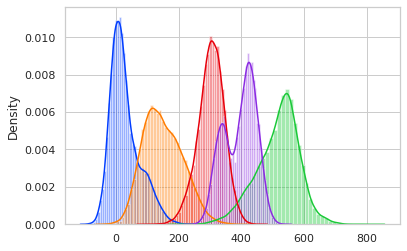

In [7]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
blue = np.concatenate((value1,value2))
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
orange = np.concatenate((value1,value2))
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
green = np.concatenate((value1,value2))
value1 = np.random.normal(loc=315,scale=35,size=10000)
value2 = np.random.normal(loc=280,scale=45,size=5000)
red = np.concatenate((value1,value2))
value1 = np.random.normal(loc=425,scale=30,size=10000)
value2 = np.random.normal(loc=335,scale=25,size=5000)
violet = np.concatenate((value1,value2))
sns.distplot(blue,bins=50)
sns.distplot(orange,bins=50)
sns.distplot(green,bins=50)
sns.distplot(red,bins=50)
sns.distplot(violet,bins=50)

In [8]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        a[i][j] = wasserstein_distance(c,b)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4
0,0.000000,121.670259,488.653835,275.227835,366.913190
1,121.670259,0.000000,366.983576,153.557576,245.242931
2,488.653835,366.983576,0.000000,213.426000,121.762465
3,275.227835,153.557576,213.426000,0.000000,91.685355
4,366.913190,245.242931,121.762465,91.685355,0.000000


In [9]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
qw=0
for i,c in enumerate(x):
    for j,b in enumerate(x):
        _,_,a[i][j] = gmm10k(c,b)
        qw=qw+1
        print(qw)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


,0,1,2,3,4
0,0.000502,34.754130,352.614852,79.144788,64.229933
1,34.768903,0.000000,291.367532,0.473524,28.893739
2,352.487134,292.165520,0.000173,245.571356,215.527560
3,79.864697,0.133670,244.979249,0.008623,10.325839
4,64.007670,28.740760,215.468616,10.325839,0.000059


In [10]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        a[i][j] = jacciboi(c,b)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4
0,1.000000,0.161415,0.000200,0.004318,0.000167
1,0.161415,1.000000,0.006002,0.088284,0.014574
2,0.000200,0.006002,1.000000,0.031491,0.172535
3,0.004318,0.088284,0.031491,1.000000,0.228212
4,0.000167,0.014574,0.172489,0.228212,1.000000


In [ ]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(blue,green)
_,w4,r14 = gmm10k(blue,red)
w1,w5,r15 = gmm10k(blue,violet)
print(r12,r13,r14,r15)
print(w1)
print(w5)
print(w4)

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


In [32]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(orange,green)
_,_,r14 = gmm10k(orange,red)
w1,w5,r15 = gmm10k(orange,violet)
print(r12,r13,r14,r15)

37.58865193991653 292.5654214229174 1.2806083561205746 34.26009222288805


<AxesSubplot:ylabel='Density'>

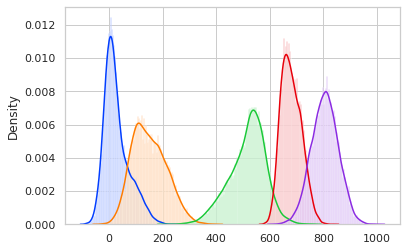

In [11]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 = np.random.normal(loc=75,scale=45,size=5000)
blue = np.concatenate((value1,value2))
value1 = np.random.normal(loc=175,scale=59,size=10000)
value2 = np.random.normal(loc=100,scale=34,size=5000)
orange = np.concatenate((value1,value2))
value1 = np.random.normal(loc=500,scale=75,size=10000)
value2 = np.random.normal(loc=550,scale=32,size=5000)
green = np.concatenate((value1,value2))
value1 = np.random.normal(loc=695,scale=35,size=10000)
value2 = np.random.normal(loc=650,scale=20,size=5000)
red = np.concatenate((value1,value2))
value1 = np.random.normal(loc=795,scale=50,size=10000)
value2 = np.random.normal(loc=825,scale=45,size=5000)
violet = np.concatenate((value1,value2))
sns.distplot(blue,bins=150)
sns.distplot(orange,bins=150)
sns.distplot(green,bins=150)
sns.distplot(red,bins=150)
sns.distplot(violet,bins=150)

In [12]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        a[i][j] = wasserstein_distance(c,b)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4
0,0.000000,122.183179,488.844902,652.026626,776.951077
1,122.183179,0.000000,366.661723,529.843447,654.767898
2,488.844902,366.661723,0.000000,163.181724,288.106176
3,652.026626,529.843447,163.181724,0.000000,124.924451
4,776.951077,654.767898,288.106176,124.924451,0.000000


In [13]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
qw=0
for i,c in enumerate(x):
    for j,b in enumerate(x):
        _,_,a[i][j] = gmm10k(c,b)
        qw=qw+1
        print(qw)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


,0,1,2,3,4
0,0.000034,37.112245,362.118618,205.962684,236.448236
1,37.210086,0.000058,303.361045,9.264535,393.062221
2,371.955882,303.488767,0.000056,243.796705,451.645622
3,204.697014,9.914870,243.748879,0.000026,362.806381
4,236.031073,392.761203,451.788454,368.010287,0.000000


In [14]:
a = np.zeros(shape=(5, 5))
x = [blue,orange,green,red,violet]
for i,c in enumerate(x):
    for j,b in enumerate(x):
        a[i][j] = jacciboi(c,b)
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4
0,1.000000,0.163622,0.000167,0.000100,0.000100
1,0.163622,1.000000,0.005024,0.000100,0.000100
2,0.000167,0.005024,1.000000,0.040000,0.007217
3,0.000100,0.000100,0.040000,1.000000,0.097600
4,0.000100,0.000100,0.007217,0.097600,1.000000


In [34]:
w1,w2,r12 = gmm10k(blue,orange)
w3,w4,r13 = gmm10k(blue,green)
_,w4,r14 = gmm10k(blue,red)
w1,w5,r15 = gmm10k(blue,violet)
print(r12,r13,r14,r15)
print(w1,w5)

33.293973551251256 346.82488773497107 197.5294041598762 241.64869975254388
[(0.7267839990374932, 6.377793571733376), (0.27321600096251, 86.1739496591768)] [(1.0, 804.6641204016516), (0, 0)]


In [35]:
w2,w3,r23 = gmm10k(orange,green)
print(r23)
print(w2)
print(w3)

288.09356712335284
[(0.5763443913271925, 111.39802597775777), (0.4236556086728079, 203.28661238677404), (0, 0), (0, 0)]
[(0.41300507778846923, 544.1452154456598), (0.25309300474245106, 479.01330610149824), (0.1859532401925684, 590.4481377528524), (0.14794867727650995, 409.4969427318484)]


In [36]:
print(wasserstein_distance(blue,orange))
print(wasserstein_distance(blue,green))
print(wasserstein_distance(blue,red))
print(wasserstein_distance(blue,violet))

122.14776075282857
488.17054916283905
651.6851784687055
776.4847401715267


<AxesSubplot:ylabel='Density'>

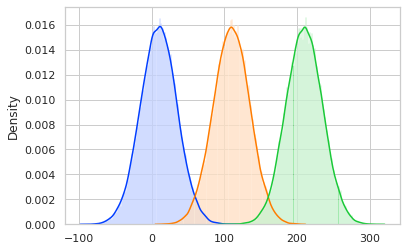

In [37]:
value1 = np.random.normal(loc=10,scale=25,size=50000)
value2 = np.random.normal(loc=110,scale=25,size=50000)
value3 = np.random.normal(loc=210,scale=25,size=50000)
sns.distplot(value1,bins=150)
sns.distplot(value2,bins=150)
sns.distplot(value3,bins=150)

In [38]:
print(wasserstein_distance(value1,value2))
print(wasserstein_distance(value2,value3))
print(wasserstein_distance(value1,value3))

100.07427504728768
100.06374883846851
200.1380238857562
